# <h1>**Case study 01**</h1>



---



# Preprocessing testing data

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the required dataset(test_loan.csv)

In [2]:
data = pd.read_csv('test_loan.csv')

# Understanding the dataset

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
data.shape

(367, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


#Missing value handling

In [7]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Analyzing the data distribution of 'LoanAmount'

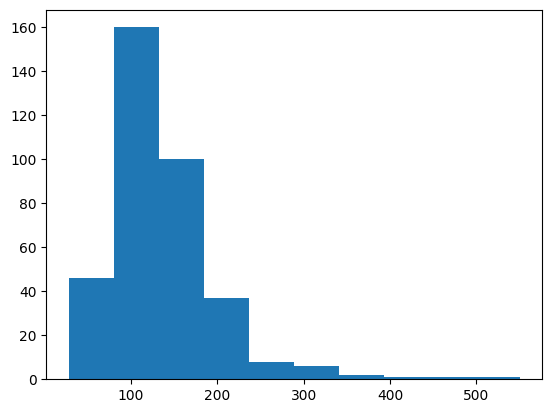

In [8]:
plt.hist(data['LoanAmount'])
plt.show()

# Handling the missing values by finding the median. Hence it is a right skewed data set

In [9]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

# Analyzing the data distribution of 'Credit_History' and handling the missing values

> Indented block



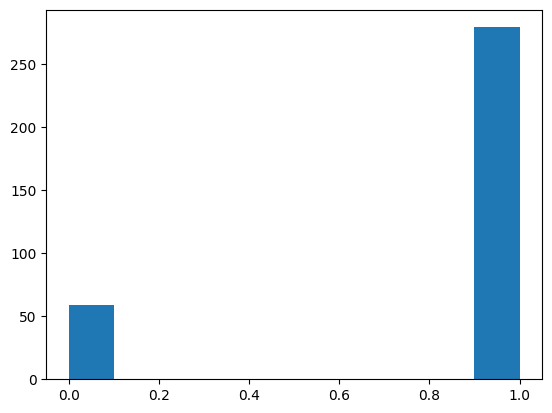

In [10]:
plt.hist(data['Credit_History'])
plt.show()

In [11]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode().iloc[0])

# Analyzing the data distribution of 'Loan_Amount_Term' and handling the missing values

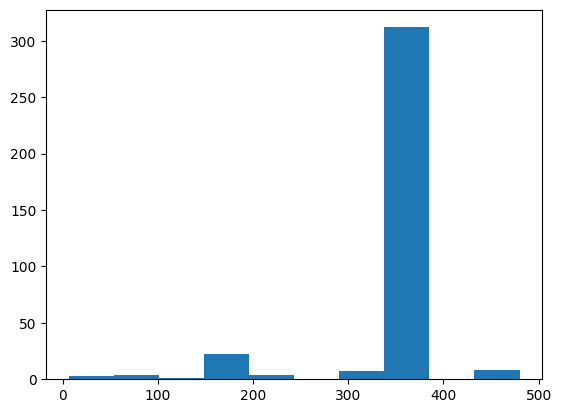

In [12]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

In [13]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

# Analyzing the data distribution of Gender,Married,Self_Employed & Dependents and handling the missing values

In [14]:
data ['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [15]:
data ['Gender'] =data['Gender'].fillna('Male')

In [16]:
data ['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [17]:
data ['Married'] =data['Married'].fillna('Yes')

In [18]:
data ['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [19]:
data ['Self_Employed'] =data['Self_Employed'].fillna('No')

In [20]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [21]:
data['Dependents'] = data['Dependents'].str.replace('+','')

<ipython-input-21-e7493c2d1d37>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents'] = data['Dependents'].str.replace('+','')


In [22]:
data['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [23]:
data['Dependents'].value_counts()

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [24]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].median())

# Checking the missing value handling is successful or not

In [25]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Identifying the outliers and handling them

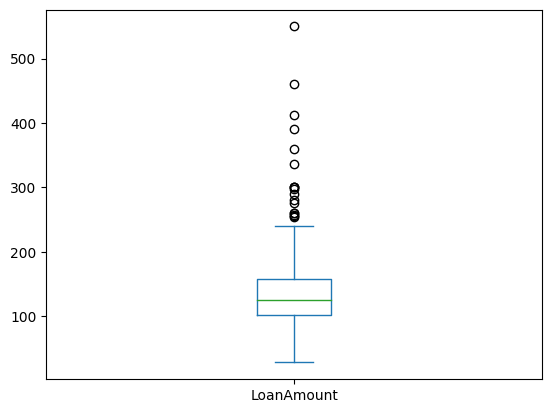

In [26]:
data['LoanAmount'].plot(kind='box')
plt.show()

In [27]:
Q1 = data['LoanAmount'].quantile(0.25)
Q2 = data['LoanAmount'].quantile(0.5)
Q3 = data['LoanAmount'].quantile(0.75)
IQR = Q3-Q1

In [28]:
low = Q1 - (1.5*IQR)
up = Q3 + (1.5*IQR)

In [29]:
print(low,up)

16.25 242.25


In [30]:
data[(data['LoanAmount']<low) | (data['LoanAmount']>up)].index

Int64Index([8, 18, 24, 27, 81, 83, 91, 96, 124, 143, 144, 189, 194, 284, 285,
            331, 345, 350],
           dtype='int64')

# Dealing the outliers with Flooring and Capping method

In [31]:
floor_value = 50
cap_value = 300

In [32]:
data['LoanAmount'] = data['LoanAmount'].apply(lambda x:
                                             max(floor_value, min(x, cap_value)))

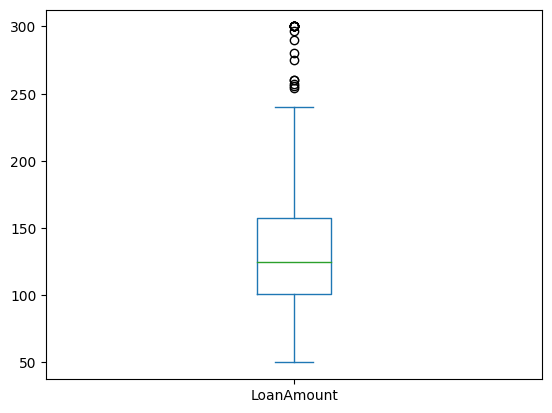

In [33]:
data['LoanAmount'].plot(kind='box')
plt.show()

# Scaling using Standardiztion

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
req_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']

In [36]:
x = data[req_cols]

In [37]:
sc = StandardScaler()

In [38]:
x.loc[:,['LoanAmount','Loan_Amount_Term']] = sc.fit_transform(x[['LoanAmount','Loan_Amount_Term']])

<ipython-input-38-17df6469e2b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['LoanAmount','Loan_Amount_Term']] = sc.fit_transform(x[['LoanAmount','Loan_Amount_Term']])


In [39]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,-0.468846,0.266022,1.0
1,3076,1500,-0.161000,0.266022,1.0
2,5000,1800,1.416707,0.266022,1.0
3,2340,2546,-0.661249,0.266022,1.0
4,3276,0,-1.084536,0.266022,1.0
